In [18]:
# For reading the dataset
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LinearRegression
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score

# for saving
import joblib

In [19]:
# Load the dataset
data_df=pd.read_csv('C:\self_studies\Datasets\student_data.csv')
data_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [20]:
# Separate dataset into train and test

X_train, X_test, y_train, y_test=train_test_split(data_df.drop(columns=['G3'], axis=1),data_df['G3'], test_size=.2, random_state=0)

X_train.shape, y_train.shape

((316, 32), (316,))

In [21]:
# Configuration

DROP_FEATURES=['Fedu', 'G2', 'Walc']
# numerical variables
NUM_VARS=['age','Medu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','health','absences','G1']
CAT_VARS=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
FEATURES=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health',
       'absences', 'G1']

In [22]:
X_train=X_train[FEATURES]
X_test=X_test[FEATURES]
X_train.shape, X_test.shape

((316, 29), (79, 29))

In [23]:
# setup the pipeline

pipe=Pipeline([('cat_enc', OrdinalEncoder(encoding_method='ordered', variables=CAT_VARS)),
               ('boxcox', PowerTransformer(method='yeo-johnson', standardize=False)),
               ('scaler', MinMaxScaler()),
               ('LR', LinearRegression())])

In [24]:
# Train the pipeline
 

pipe.fit(X_train, y_train)

Pipeline(steps=[('cat_enc',
                 OrdinalEncoder(variables=['school', 'sex', 'address',
                                           'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                           'reason', 'guardian', 'schoolsup',
                                           'famsup', 'paid', 'activities',
                                           'nursery', 'higher', 'internet',
                                           'romantic'])),
                ('boxcox', PowerTransformer(standardize=False)),
                ('scaler', MinMaxScaler()), ('LR', LinearRegression())])

In [25]:
# Evaluate the pipeline

# train predictions

tr_yhat=pipe.predict(X_train)
print(f'train mse {mean_squared_error(y_train, tr_yhat)}')
print(f'Train r2 {r2_score(y_train, tr_yhat)}')

# test predictions

tst_yhat=pipe.predict(X_test[X_train.columns])
print(f'Test mse {mean_squared_error(y_test, tst_yhat)}')
print(f'Test r2 {r2_score(y_test, tst_yhat)}')


train mse 5.559117542643246
Train r2 0.7112999812053988
Test mse 8.328847025077877
Test r2 0.6981081978167809


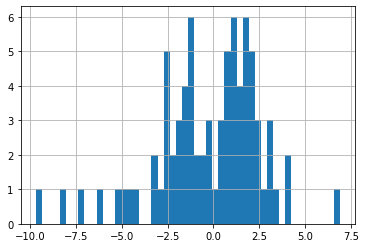

In [26]:
# Evaluate the distribution of errors

y_test.reset_index(drop=True, inplace=True)

preds=pd.Series(tst_yhat)
errors=y_test-preds
errors.hist(bins=50);

In [27]:
# Save the pipeline

joblib.dump(pipe, 'pipe_grades.joblib')

['pipe_grades.joblib']